# **Answer Problem 1: 4.33 secs. Please go through the jupyter file to find the work**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

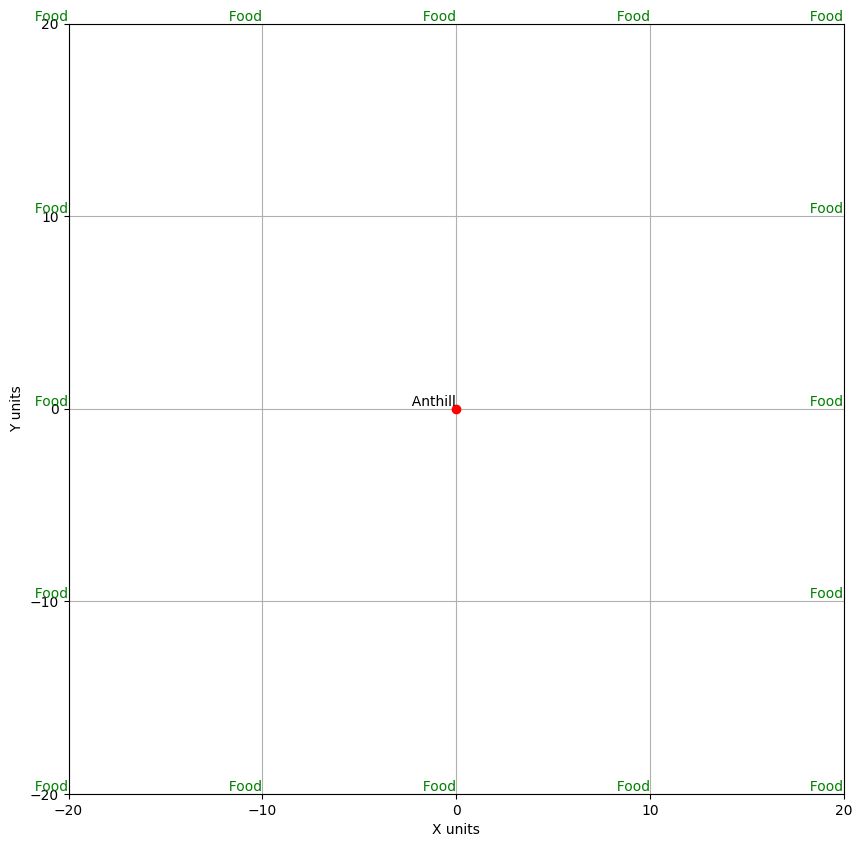

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))  # figsize is in inches, not units

# Set the limits of the plot
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

# Set grid with distance of 10 units
ax.set_xticks(range(-20, 21, 10))
ax.set_yticks(range(-20, 21, 10))
ax.grid(which='both')

# Mark the anthill at (0,0)
ax.plot(0, 0, 'ro')  # 'ro' means red color, circle marker
ax.text(0, 0, '  Anthill', verticalalignment='bottom', horizontalalignment='right')

# Mark the food at all corner coordinates
corners = [(0,20),(-10,20),(10,20),(20,20),(20,10),(20,0),(20,-10),(20,-20),(10,-20),(0,-20),(-10,-20),(-20,-20),(-20,-10),(-20,0),(-20,10),(-20,20)]
for (x, y) in corners:
    ax.plot(x, y, 'green')  # 'go' means green color, circle marker
    ax.text(x, y, '  Food', verticalalignment='bottom', horizontalalignment='right', color='green')

# Mark the ant at (10,10

# Set labels for x and y axes
ax.set_xlabel('X units')
ax.set_ylabel('Y units')

# Show the plot
plt.show()


Given: An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

Problem statement: If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?

In [ ]:
arr= np.empty((5,5), dtype= tuple)
x= list()
for i in range(5):
  y= list()
  for j in range(5):
    #y.append((i,j))
    arr[j,i]= ((i-2)*10,(j-2)*-10)

Lets Create a numpy array of the co-ordinates of ant's initial and possible states

In [ ]:
arr

array([[(-20, 20), (-10, 20), (0, 20), (10, 20), (20, 20)],
       [(-20, 10), (-10, 10), (0, 10), (10, 10), (20, 10)],
       [(-20, 0), (-10, 0), (0, 0), (10, 0), (20, 0)],
       [(-20, -10), (-10, -10), (0, -10), (10, -10), (20, -10)],
       [(-20, -20), (-10, -20), (0, -20), (10, -20), (20, -20)]],
      dtype=object)

In [ ]:
G= nx.Graph()

In [ ]:
for i in range(-20,30,10):
  for j in range(-20,30,10):
    G.add_node((i,j))


In [ ]:
list(G.nodes)[24]

(20, 20)

Adding edges with the weightage of possible movemnt of the ant

In [ ]:
n=5
for row in range(n):
    for col in range(n):
        node = row * n + col
        #print((row-2,col-2), end=" ")

        # Add edges to neighbors (up, down, left, right)
        if row > 0:  # Up
          G.add_edge(arr[row][col], arr[row-1][col], p=0.25)
            #adj[node][node - n] = 0.25
        if row < n - 1:  # Down
          G.add_edge(arr[row][col], arr[row+1][col], p=0.25)
            #adj[node][node + n] = 0.25
        if col > 0:  # Left
            #adj[node][node - 1] = 0.25
            G.add_edge(arr[row][col], arr[row][col-1], p=0.25)
        if col < n - 1:  # Right
            #adj[node][node + 1] = 0.25
            G.add_edge(arr[row][col], arr[row][col+1], p=0.25)

In [ ]:
G.edges

EdgeView([((-20, -20), (-20, -10)), ((-20, -20), (-10, -20)), ((-20, -10), (-20, 0)), ((-20, -10), (-10, -10)), ((-20, 0), (-20, 10)), ((-20, 0), (-10, 0)), ((-20, 10), (-20, 20)), ((-20, 10), (-10, 10)), ((-20, 20), (-10, 20)), ((-10, -20), (-10, -10)), ((-10, -20), (0, -20)), ((-10, -10), (-10, 0)), ((-10, -10), (0, -10)), ((-10, 0), (-10, 10)), ((-10, 0), (0, 0)), ((-10, 10), (-10, 20)), ((-10, 10), (0, 10)), ((-10, 20), (0, 20)), ((0, -20), (0, -10)), ((0, -20), (10, -20)), ((0, -10), (0, 0)), ((0, -10), (10, -10)), ((0, 0), (0, 10)), ((0, 0), (10, 0)), ((0, 10), (0, 20)), ((0, 10), (10, 10)), ((0, 20), (10, 20)), ((10, -20), (10, -10)), ((10, -20), (20, -20)), ((10, -10), (10, 0)), ((10, -10), (20, -10)), ((10, 0), (10, 10)), ((10, 0), (20, 0)), ((10, 10), (10, 20)), ((10, 10), (20, 10)), ((10, 20), (20, 20)), ((20, -20), (20, -10)), ((20, -10), (20, 0)), ((20, 0), (20, 10)), ((20, 10), (20, 20))])

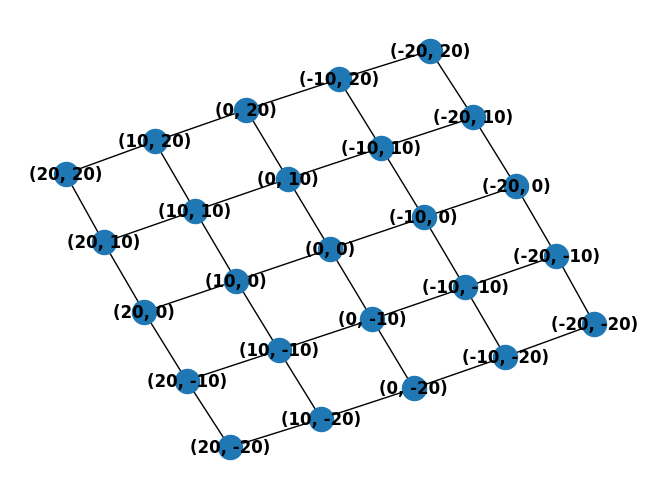

In [ ]:
# prompt: plot a nx graph

nx.draw(G, with_labels=True, font_weight='bold', pos=nx.kamada_kawai_layout (G))


In this diagram above the possible states are shown as nodes whereas the edges represent the route the ant can take to travel from one position to another

In [ ]:
#list(G.adjacency())

Now we can create an adjacency matrix for the graph above

In [ ]:
# prompt: print an adjacency matrix of graph G

#print(nx.adjacency_matrix(G,weight='p').todense())
adj= nx.adjacency_matrix(G,weight='p').todense()
adj

array([[0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.25,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

Now following the n-step transitions of Markov Chain we can find out the probability of ant being in a spot where it finds the food

According to which the probability of change in state from i(initial state) to j(final_state) after n number of transitions can be given by (i-th row,j-th column) value of the Adjacency Matrix raised to the power of n

P
ij
(n)
​
 =(P ^
n
 )
ij
​


Here in our Adjacency matrix the initial position of ant is (0,0) which is represented by 12th item of row and column (of flattened positions starting from  -20,-20 to 20,20)

And the positions which the food is in are prepresented by

As in the figure above you can see the food is at the co-ordinates
F= {(0,20),(10,20),(20,20),(20,10),(20,0),(20,-10),(20,-20),(10,-20),(0,-20),(-10,-20),(-20,-20),(-20,-10),(-20,0),(-20,10)(-20,20)}

Out of which the four corners (-20,-20), (20,-20),(-20,20), (20,20) are not reachable unless you are already in the food spots.

Therefore we only need the probability for the ant to reach the other remaining 12 spots from F

Which in the adjacency matrix are reprented by the (1,2,3,5,9,10,14,15,19,21,22,23) th items of both row and column

We can create a small block of code to
1. Take a variable failure=1 which would act as our factor to get our outcome probability out of remaining chances of getting to the food
2. calculate the probability of ant being in each one of the 12 food positions after n transitions
3. Add all the probability from step 1 to get probability of ant being in any of the positions and call it p
4. Now multiply failure with our current sum of probability at nth transition which would be our success probability
5. Multiply the success probability with the corresponding n/second to get the weightage in respect to time
6. change the failure to failure x(1-p)

7. Repeat the steps from 1 to 6

There will come a time when the final result will become stationary. Which can be taken as our final result

In [ ]:
result=[]
sum_factor=0
i=12
failure=1
adj_= adj.copy()
for n in range(1,100):
  adj_=np.linalg.matrix_power(adj, n)
  p=0

  for j in (1,2,3,5,9,10,14,15,19,21,22,23):
    p+= adj_[i][j]
  success= failure*p
  failure= failure* (1- p)
  sum_factor+= n*success
  print(n,":",round(success,2),round(sum_factor,2) )
  result.append(sum_factor)




1 : 0.0 0.0
2 : 0.25 0.5
3 : 0.28 1.34
4 : 0.11 1.78
5 : 0.13 2.41
6 : 0.04 2.67
7 : 0.05 3.04
8 : 0.02 3.19
9 : 0.02 3.42
10 : 0.01 3.51
11 : 0.01 3.66
12 : 0.01 3.73
13 : 0.01 3.83
14 : 0.0 3.87
15 : 0.0 3.94
16 : 0.0 3.98
17 : 0.0 4.03
18 : 0.0 4.06
19 : 0.0 4.1
20 : 0.0 4.12
21 : 0.0 4.15
22 : 0.0 4.17
23 : 0.0 4.19
24 : 0.0 4.2
25 : 0.0 4.22
26 : 0.0 4.23
27 : 0.0 4.24
28 : 0.0 4.25
29 : 0.0 4.26
30 : 0.0 4.27
31 : 0.0 4.28
32 : 0.0 4.28
33 : 0.0 4.29
34 : 0.0 4.29
35 : 0.0 4.3
36 : 0.0 4.3
37 : 0.0 4.31
38 : 0.0 4.31
39 : 0.0 4.31
40 : 0.0 4.31
41 : 0.0 4.32
42 : 0.0 4.32
43 : 0.0 4.32
44 : 0.0 4.32
45 : 0.0 4.32
46 : 0.0 4.32
47 : 0.0 4.32
48 : 0.0 4.33
49 : 0.0 4.33
50 : 0.0 4.33
51 : 0.0 4.33
52 : 0.0 4.33
53 : 0.0 4.33
54 : 0.0 4.33
55 : 0.0 4.33
56 : 0.0 4.33
57 : 0.0 4.33
58 : 0.0 4.33
59 : 0.0 4.33
60 : 0.0 4.33
61 : 0.0 4.33
62 : 0.0 4.33
63 : 0.0 4.33
64 : 0.0 4.33
65 : 0.0 4.33
66 : 0.0 4.33
67 : 0.0 4.33
68 : 0.0 4.33
69 : 0.0 4.33
70 : 0.0 4.33
71 : 0.0 4.33
72 : 0.0 

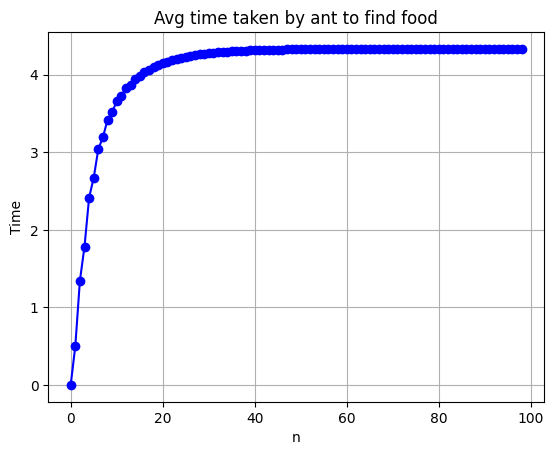

In [ ]:
# Plot the function
plt.plot(range(len(result)), result, marker='o', linestyle='-', color='b')
plt.title('Avg time taken by ant to find food')
plt.xlabel('n')
plt.ylabel('Time')
plt.grid(True)
plt.show()